# Wedge Project Material Stock Projection - Combine Approach 1 and 2 Results

1. **Approach 1** uses historic material consumption data and ARIMA/SARIMA time series moving average models to project material consumptions. Historic data is mostly obtained from USGS for raw building material ingredients (e.g., cement, steel, lime, etc.)
2. **Approach 2** uses floor area projections (for buildings, and possibly for infrastructure) and material intensity data to project material consumptions. Building-level data is primarily available per building material categories (e.g., concrete, steel, rebar, bricks, etc.)



## Import libraries

In [192]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Import Approach 1 and 2 Results

In [193]:
# Read the CSV file and assign it to a DataFrame

# Approach 1
approach_1_projections_best_fit = pd.read_excel('./Approach 1/Output Data/approach1_construction_quantities.xlsx')
approach_2_projections = pd.read_csv('./Approach 2/Output Data/material_stock_projection_by_wedge_categories.csv')


## Merging

In [194]:
# Transpose approach_1_projections_best_fit and restructure
approach_1_transposed = approach_1_projections_best_fit.set_index('year').T.reset_index()
approach_1_transposed = approach_1_transposed.rename(columns={'index': 'mat_type'})
approach_1_transposed.columns = [str(col) if col != 'mat_type' else col for col in approach_1_transposed.columns]

# Add approach column for approach_1 and reorder
approach_1_transposed.insert(1, 'approach', 'approach_1')

# Add approach column for approach_2
approach_2_projections.insert(1, 'approach', 'approach_2')

# Merge the dataframes
material_stock_projections_approach_1_and_2 = pd.concat([approach_2_projections, approach_1_transposed], ignore_index=True)

material_stock_projections_approach_1_and_2.head()



,mat_type,approach,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Acoustic ceiling tile aluminum,approach_2,37080.059950,43369.141935,41771.062711,43993.007529,45769.788625,49554.282716,47862.136496,47069.356837,...,45026.157881,44868.245232,44959.908340,45231.553504,45637.757478,46138.307909,46686.014552,47240.899452,47781.005825,48276.869919
1,Acoustic ceiling tile fiber,approach_2,273817.740435,260144.593919,263436.368765,306271.119317,316459.796273,335631.701587,328633.127890,326304.072479,...,312204.813130,310533.215836,310713.840747,311737.588080,313363.367290,315055.188582,317297.416867,319025.449131,320474.683538,321924.768647
2,Acoustic ceiling tile steel,approach_2,24590.935361,25276.404670,26759.311230,27778.501011,28899.027995,31288.906961,30223.916680,29726.313851,...,28462.999643,28364.669325,28423.987662,28596.907372,28854.866046,29172.426978,29520.176313,29872.197985,30214.990389,30529.817791
3,Acoustic ceilings - other,approach_2,103953.778696,120350.616630,114740.062181,114587.100657,115778.998727,123402.153819,120230.396479,118969.323966,...,115520.977430,115135.823201,115312.947156,115808.607577,116637.546958,117679.892346,119200.635058,120505.551326,121895.367774,123199.000834
4,Adhesives and sealants,approach_2,63781.984427,59985.765741,58917.548454,69462.039712,70950.234734,74409.353109,73319.215776,73109.975638,...,69924.167271,69491.912137,69466.765101,69577.102153,69798.800630,69992.518073,70392.058913,70595.291240,70748.440795,70925.757171


Reorganize material types for approach 1.

In [195]:
# Group mat_types and sum values
cement_concrete_mats = ['stone_crushed_concrete', 'sand_and_gravel_construction_concrete', 'cement_ready_mix', 'cement_concrete_products']

cement_concrete_rows = material_stock_projections_approach_1_and_2[material_stock_projections_approach_1_and_2['mat_type'].isin(cement_concrete_mats) & (material_stock_projections_approach_1_and_2['approach'] == 'approach_1')]

cement_concrete_sum = pd.DataFrame({
    'mat_type': ['cement_concrete'],
    'approach': ['approach_1']
})

for col in material_stock_projections_approach_1_and_2.columns:
    if col.isdigit():
        cement_concrete_sum[col] = cement_concrete_rows[col].sum()

material_stock_projections_approach_1_and_2 = material_stock_projections_approach_1_and_2[~((material_stock_projections_approach_1_and_2['mat_type'].isin(cement_concrete_mats)) & (material_stock_projections_approach_1_and_2['approach'] == 'approach_1'))]

material_stock_projections_approach_1_and_2 = pd.concat([material_stock_projections_approach_1_and_2, cement_concrete_sum], ignore_index=True)

# Filter for approach_1 and specified mat_types
approach_1_mat_types = [
    'cement_concrete',
    'steel',
    'sand_and_gravel_construction_road_base_fill',
    'sand_and_gravel_construction_other_construction',
    'asphalt_concrete',
    'asphalt_binder_no_hma',
    'aluminum',
    'copper',
    'lime',
    'flat_glass',
    'plywood_veneer',
    'wood_panel_products'
]

# Filter approach_1 data
approach_1_filtered = material_stock_projections_approach_1_and_2[
    (material_stock_projections_approach_1_and_2['approach'] == 'approach_1') &
    (material_stock_projections_approach_1_and_2['mat_type'].isin(approach_1_mat_types))
]

# Filter approach_2 data
approach_2_filtered = material_stock_projections_approach_1_and_2[
    (material_stock_projections_approach_1_and_2['approach'] == 'approach_2')
]

# Concatenate approach_1 and approach_2 data
combined_approach_1_and_2 = pd.concat([approach_2_filtered, approach_1_filtered], ignore_index=True)


In [196]:
combined_approach_1_and_2.head()

,mat_type,approach,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Acoustic ceiling tile aluminum,approach_2,37080.059950,43369.141935,41771.062711,43993.007529,45769.788625,49554.282716,47862.136496,47069.356837,...,45026.157881,44868.245232,44959.908340,45231.553504,45637.757478,46138.307909,46686.014552,47240.899452,47781.005825,48276.869919
1,Acoustic ceiling tile fiber,approach_2,273817.740435,260144.593919,263436.368765,306271.119317,316459.796273,335631.701587,328633.127890,326304.072479,...,312204.813130,310533.215836,310713.840747,311737.588080,313363.367290,315055.188582,317297.416867,319025.449131,320474.683538,321924.768647
2,Acoustic ceiling tile steel,approach_2,24590.935361,25276.404670,26759.311230,27778.501011,28899.027995,31288.906961,30223.916680,29726.313851,...,28462.999643,28364.669325,28423.987662,28596.907372,28854.866046,29172.426978,29520.176313,29872.197985,30214.990389,30529.817791
3,Acoustic ceilings - other,approach_2,103953.778696,120350.616630,114740.062181,114587.100657,115778.998727,123402.153819,120230.396479,118969.323966,...,115520.977430,115135.823201,115312.947156,115808.607577,116637.546958,117679.892346,119200.635058,120505.551326,121895.367774,123199.000834
4,Adhesives and sealants,approach_2,63781.984427,59985.765741,58917.548454,69462.039712,70950.234734,74409.353109,73319.215776,73109.975638,...,69924.167271,69491.912137,69466.765101,69577.102153,69798.800630,69992.518073,70392.058913,70595.291240,70748.440795,70925.757171


Map mat_type to mat_group from the WBLCA benchmarking study.

In [197]:
# Load the mapping CSV file
mapping_df = pd.read_csv("./Approach 2/Output Data/mat_type_to_mat_group_mapping.csv")

# Ensure the mapping file has columns named 'mat_type' and 'mat_group'
if 'mat_type' not in mapping_df.columns or 'mat_group' not in mapping_df.columns:
    raise ValueError("Mapping file must contain columns named 'mat_type' and 'mat_group'")

# Merge the mapping DataFrame with the combined_approach_1_and_2
combined_approach_1_and_2 = pd.merge(combined_approach_1_and_2, mapping_df, on='mat_type', how='left')

# Move 'mat_group' to the second column
cols = combined_approach_1_and_2.columns.tolist()
cols.insert(1, cols.pop(cols.index('mat_group')))  # Move 'mat_group' to index 1
combined_approach_1_and_2 = combined_approach_1_and_2[cols]

In [198]:
combined_approach_1_and_2.tail()

,mat_type,mat_group,approach,2020,2021,2022,2023,2024,2025,2026,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
124,lime,NaN,approach_1,2.023490e+06,2.027964e+06,2.032447e+06,2.036941e+06,2.041444e+06,2.045957e+06,2.050480e+06,...,2.119541e+06,2.124227e+06,2.128923e+06,2.133630e+06,2.138347e+06,2.143074e+06,2.147812e+06,2.152561e+06,2.157319e+06,2.162089e+06
125,flat_glass,NaN,approach_1,7.459174e+06,7.523139e+06,7.587653e+06,7.652720e+06,7.718344e+06,7.784532e+06,7.851287e+06,...,8.924138e+06,9.000665e+06,9.077849e+06,9.155695e+06,9.234209e+06,9.313396e+06,9.393261e+06,9.473812e+06,9.555054e+06,9.636992e+06
126,plywood_veneer,NaN,approach_1,6.072281e+06,6.151719e+06,6.231118e+06,6.310478e+06,6.389798e+06,6.469079e+06,6.548321e+06,...,7.732283e+06,7.810904e+06,7.889486e+06,7.968031e+06,8.046536e+06,8.125004e+06,8.203433e+06,8.281823e+06,8.360176e+06,8.438490e+06
127,wood_panel_products,NaN,approach_1,8.930379e+06,9.037442e+06,9.145788e+06,9.255433e+06,9.366392e+06,9.478682e+06,9.592318e+06,...,1.146985e+07,1.160736e+07,1.174651e+07,1.188734e+07,1.202985e+07,1.217407e+07,1.232002e+07,1.246772e+07,1.261719e+07,1.276845e+07
128,cement_concrete,NaN,approach_1,7.393425e+08,7.488108e+08,7.584052e+08,7.681274e+08,7.779790e+08,7.879620e+08,7.980780e+08,...,9.670715e+08,9.795793e+08,9.922543e+08,1.005099e+09,1.018115e+09,1.031306e+09,1.044673e+09,1.058220e+09,1.071947e+09,1.085859e+09


In [199]:
# Assuming combined_approach_1_and_2 is already created and populated as in the previous steps

# Create 'concrete_not_covered_in_approach_2'
concrete_approach_1 = combined_approach_1_and_2[(combined_approach_1_and_2['mat_type'] == 'cement_concrete') & (combined_approach_1_and_2['approach'] == 'approach_1')]
concrete_approach_2 = combined_approach_1_and_2[(combined_approach_1_and_2['mat_group'] == 'Concrete') & (combined_approach_1_and_2['approach'] == 'approach_2')]

if not concrete_approach_1.empty and not concrete_approach_2.empty:
    concrete_not_covered = pd.DataFrame({
        'mat_type': ['concrete_not_covered_in_approach_2'],
        'approach': ['approach_1']
    })

    for col in combined_approach_1_and_2.columns:
        if col.isdigit():
            concrete_not_covered[col] = concrete_approach_1[col].values[0] - concrete_approach_2[col].sum()

    combined_approach_1_and_2 = pd.concat([combined_approach_1_and_2, concrete_not_covered], ignore_index=True)

# Create 'steel_not_covered_in_approach_2'
steel_approach_1 = combined_approach_1_and_2[(combined_approach_1_and_2['mat_type'] == 'steel') & (combined_approach_1_and_2['approach'] == 'approach_1')]
steel_approach_2 = combined_approach_1_and_2[(combined_approach_1_and_2['mat_group'] == 'Steel') & (combined_approach_1_and_2['approach'] == 'approach_2')]

if not steel_approach_1.empty and not steel_approach_2.empty:
    steel_not_covered = pd.DataFrame({
        'mat_type': ['steel_not_covered_in_approach_2'],
        'approach': ['approach_1']
    })

    for col in combined_approach_1_and_2.columns:
        if col.isdigit():
            steel_not_covered[col] = steel_approach_1[col].values[0] - steel_approach_2[col].sum()

    combined_approach_1_and_2 = pd.concat([combined_approach_1_and_2, steel_not_covered], ignore_index=True)

combined_approach_1_and_2.tail()

,mat_type,mat_group,approach,2020,2021,2022,2023,2024,2025,2026,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
126,plywood_veneer,NaN,approach_1,6.072281e+06,6.151719e+06,6.231118e+06,6.310478e+06,6.389798e+06,6.469079e+06,6.548321e+06,...,7.732283e+06,7.810904e+06,7.889486e+06,7.968031e+06,8.046536e+06,8.125004e+06,8.203433e+06,8.281823e+06,8.360176e+06,8.438490e+06
127,wood_panel_products,NaN,approach_1,8.930379e+06,9.037442e+06,9.145788e+06,9.255433e+06,9.366392e+06,9.478682e+06,9.592318e+06,...,1.146985e+07,1.160736e+07,1.174651e+07,1.188734e+07,1.202985e+07,1.217407e+07,1.232002e+07,1.246772e+07,1.261719e+07,1.276845e+07
128,cement_concrete,NaN,approach_1,7.393425e+08,7.488108e+08,7.584052e+08,7.681274e+08,7.779790e+08,7.879620e+08,7.980780e+08,...,9.670715e+08,9.795793e+08,9.922543e+08,1.005099e+09,1.018115e+09,1.031306e+09,1.044673e+09,1.058220e+09,1.071947e+09,1.085859e+09
129,concrete_not_covered_in_approach_2,NaN,approach_1,4.700251e+08,4.822338e+08,4.936033e+08,4.717119e+08,4.750512e+08,4.675445e+08,4.838011e+08,...,6.645217e+08,6.783994e+08,6.907588e+08,7.025551e+08,7.138892e+08,7.252538e+08,7.358972e+08,7.473740e+08,7.591290e+08,7.710907e+08
130,steel_not_covered_in_approach_2,NaN,approach_1,1.165696e+07,1.141764e+07,1.171253e+07,1.008346e+07,9.795190e+06,8.634798e+06,9.425128e+06,...,1.431072e+07,1.467809e+07,1.492907e+07,1.512100e+07,1.526334e+07,1.538600e+07,1.545372e+07,1.555783e+07,1.566857e+07,1.578949e+07


In [200]:
# Define mat_types to keep and renaming dictionary
mat_types_to_keep_approach_1 = [
    'concrete_not_covered_in_approach_2',
    'steel_not_covered_in_approach_2',
    'asphalt_concrete',
    'sand_and_gravel_construction_road_base_fill',
    'sand_and_gravel_construction_other_construction'
]

renaming_dict = {
    'concrete_not_covered_in_approach_2': 'Concrete (not covered in Approach 2)',
    'steel_not_covered_in_approach_2': 'Steel (not covered in Approach 2)',
    'asphalt_concrete': 'Asphalt concrete',
    'sand_and_gravel_construction_road_base_fill': 'Sand and gravel (roadway)',
    'sand_and_gravel_construction_other_construction': 'Sand and gravel (other)'
}

# Filter and rename mat_types
filtered_df_approach_1 = combined_approach_1_and_2[
    (combined_approach_1_and_2['approach'] == 'approach_1') & 
    (combined_approach_1_and_2['mat_type'].isin(mat_types_to_keep_approach_1))
].replace({'mat_type': renaming_dict})

filtered_df_approach_2 = combined_approach_1_and_2[
    (combined_approach_1_and_2['approach'] == 'approach_2')
]

combined_approach_1_and_2 = pd.concat([filtered_df_approach_2, filtered_df_approach_1], ignore_index=True)


# Display the first few rows of the updated combined_approach_1_and_2 to check the result
combined_approach_1_and_2.tail(5)

,mat_type,mat_group,approach,2020,2021,2022,2023,2024,2025,2026,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
117,Asphalt concrete,NaN,approach_1,3.341186e+08,3.381696e+08,3.422697e+08,3.464195e+08,3.506196e+08,3.548706e+08,3.591732e+08,...,4.303404e+08,4.355580e+08,4.408388e+08,4.461837e+08,4.515934e+08,4.570687e+08,4.626103e+08,4.682192e+08,4.738960e+08,4.796417e+08
118,Sand and gravel (roadway),NaN,approach_1,1.999147e+08,2.021172e+08,2.043439e+08,2.065951e+08,2.088712e+08,2.111723e+08,2.134988e+08,...,2.516358e+08,2.544081e+08,2.572109e+08,2.600446e+08,2.629095e+08,2.658060e+08,2.687344e+08,2.716950e+08,2.746883e+08,2.777145e+08
119,Sand and gravel (other),NaN,approach_1,3.563697e+08,3.602958e+08,3.642652e+08,3.682783e+08,3.723356e+08,3.764376e+08,3.805849e+08,...,4.485682e+08,4.535101e+08,4.585064e+08,4.635578e+08,4.686648e+08,4.738281e+08,4.790482e+08,4.843259e+08,4.896617e+08,4.950564e+08
120,Concrete (not covered in Approach 2),NaN,approach_1,4.700251e+08,4.822338e+08,4.936033e+08,4.717119e+08,4.750512e+08,4.675445e+08,4.838011e+08,...,6.645217e+08,6.783994e+08,6.907588e+08,7.025551e+08,7.138892e+08,7.252538e+08,7.358972e+08,7.473740e+08,7.591290e+08,7.710907e+08
121,Steel (not covered in Approach 2),NaN,approach_1,1.165696e+07,1.141764e+07,1.171253e+07,1.008346e+07,9.795190e+06,8.634798e+06,9.425128e+06,...,1.431072e+07,1.467809e+07,1.492907e+07,1.512100e+07,1.526334e+07,1.538600e+07,1.545372e+07,1.555783e+07,1.566857e+07,1.578949e+07


### Export

In [201]:
combined_approach_1_and_2.to_excel("./combined_approach_1_and_2.xlsx", index=False)

## Visualizations

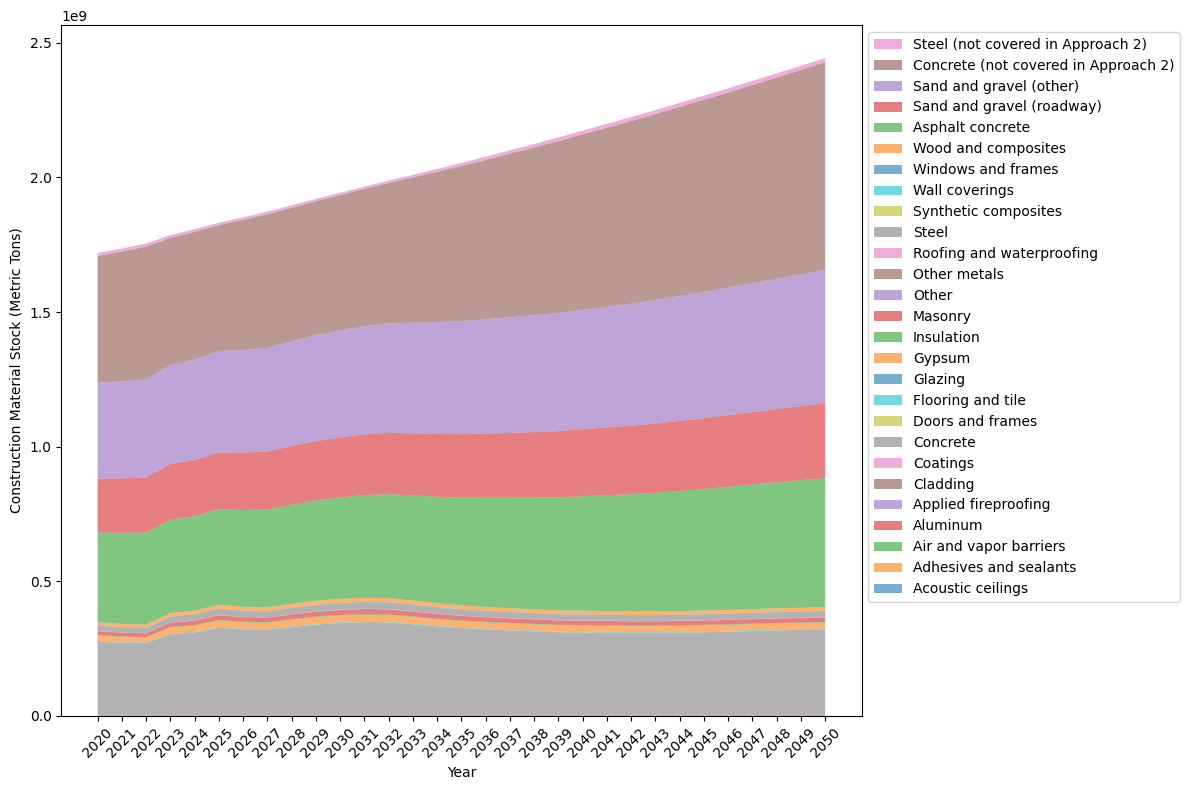

In [204]:

# Assuming combined_approach_1_and_2 is already loaded and populated

# Group approach_2 by mat_group and sum
approach_2_grouped = combined_approach_1_and_2[combined_approach_1_and_2['approach'] == 'approach_2'].groupby('mat_group').sum()

# Get approach_1 data, using mat_type since mat_group is NaN
approach_1_data = combined_approach_1_and_2[combined_approach_1_and_2['approach'] == 'approach_1'].set_index('mat_type')

# Combine data for plotting
combined_data = pd.concat([approach_2_grouped, approach_1_data])

# Extract data for years 2020 to 2050
years = [str(year) for year in range(2020, 2051)]
plot_data = combined_data[years]

# Plotting with transparency
plt.figure(figsize=(12, 8))
plt.stackplot(years, plot_data.values, labels=plot_data.index, alpha=0.6) # Added alpha=0.6 for transparency
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Construction Material Stock (Metric Tons)')
plt.title('')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Reverse the legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1.0, 1.0))


plt.tight_layout()
plt.show()

C:\Users\ashtiani\AppData\Local\Temp\ipykernel_34892\3765883500.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_1 = cm.get_cmap('tab20', num_colors_1).colors


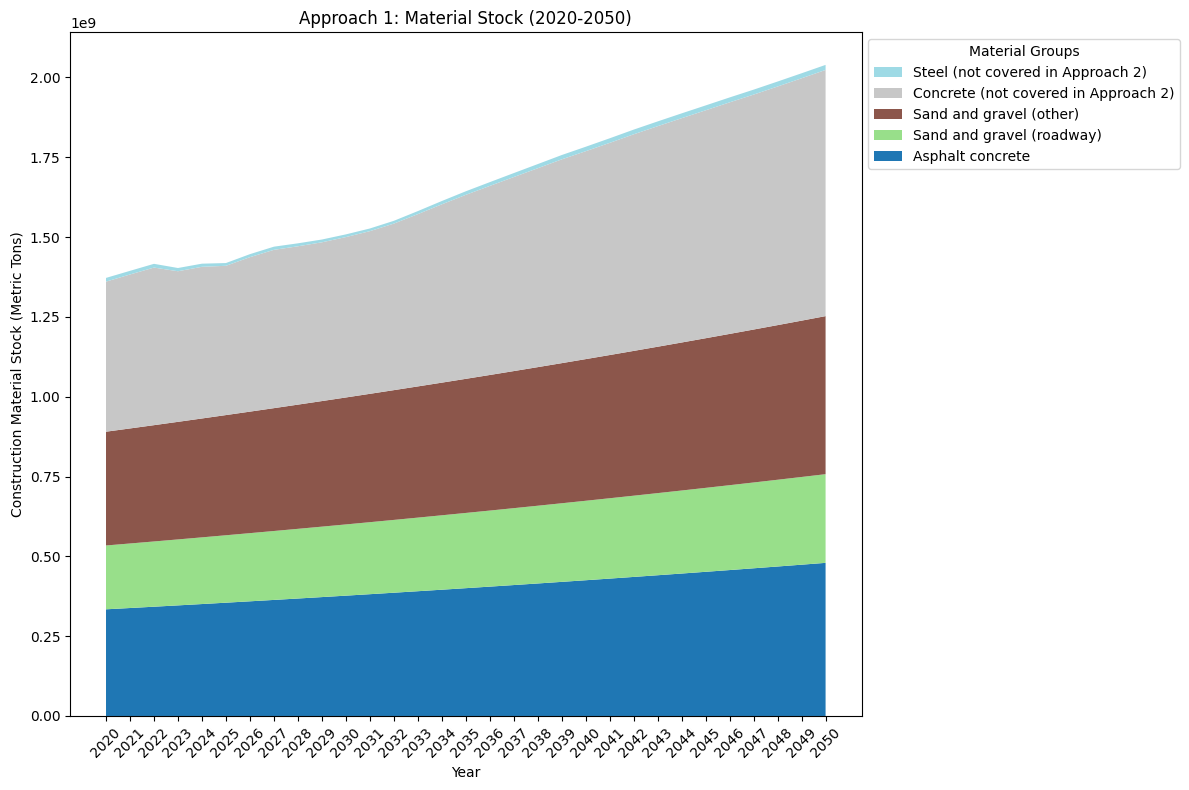

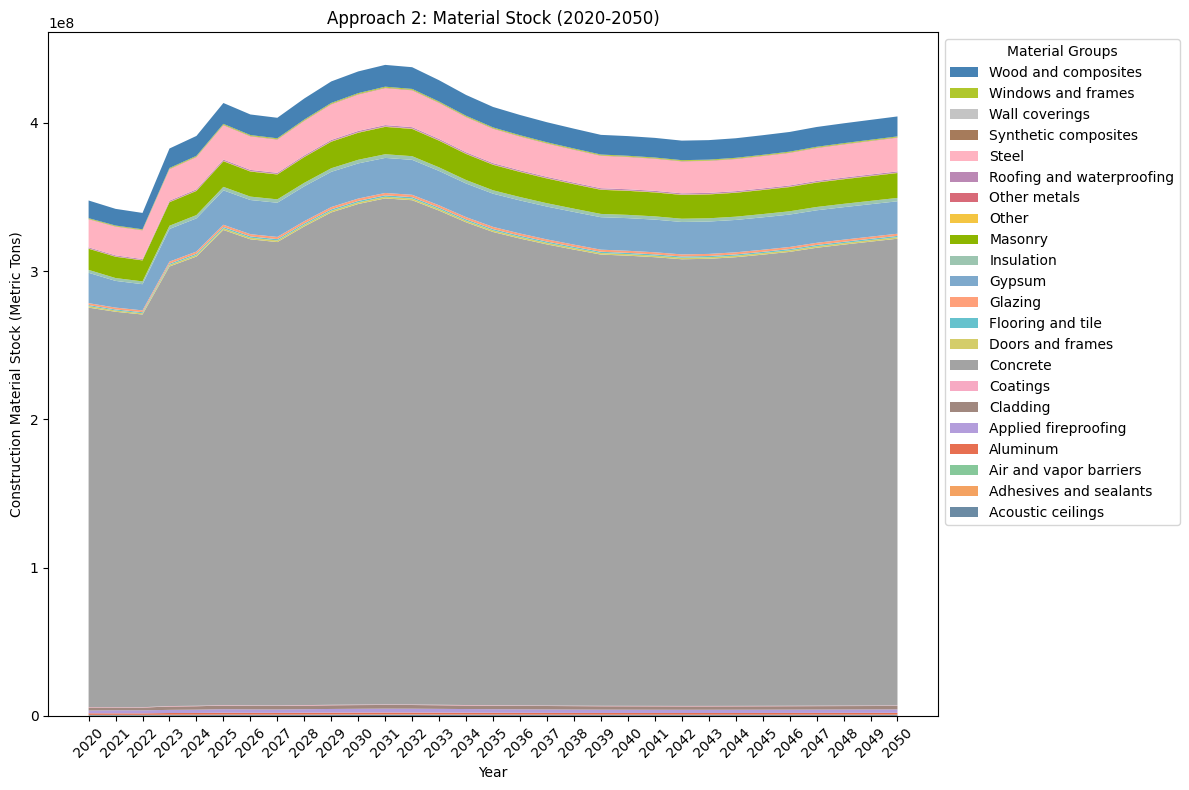

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming combined_approach_1_and_2 is already loaded and populated

# Extract data for years 2020 to 2050
years = [str(year) for year in range(2020, 2051)]

# --- Approach 1 Plot ---
approach_1_data = combined_approach_1_and_2[combined_approach_1_and_2['approach'] == 'approach_1'].set_index('mat_type')[years]

num_colors_1 = len(approach_1_data.index)
colors_1 = cm.get_cmap('tab20', num_colors_1).colors

plt.figure(figsize=(12, 8))
plt.stackplot(years, approach_1_data.values, labels=approach_1_data.index, colors=colors_1)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Construction Material Stock (Metric Tons)')
plt.title('Approach 1: Material Stock (2020-2050)')
plt.legend(title='Material Groups', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Reverse legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Material Groups', loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

# --- Approach 2 Plot ---
approach_2_grouped = combined_approach_1_and_2[combined_approach_1_and_2['approach'] == 'approach_2'].groupby('mat_group').sum()[years]

my_colors = [
    "#6b8ba4", "#f4a261", "#86c89a", "#e76f51", "#b39ddb", "#a1887f",
    "#f7aac3", "#a3a3a3", "#d4cd6a", "#66c2cd", "#ffa07a", "#7ea9cc",
    "#9cc5b0", "#8db600", "#f4c542", "#d86a78", "#bb88b4", "#ffb3c1",
    "#a67b5b", "#c4c4c4", "#b0c72c", "#4682b4"
]

plt.figure(figsize=(12, 8))
plt.stackplot(years, approach_2_grouped.values, labels=approach_2_grouped.index, colors=my_colors)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Construction Material Stock (Metric Tons)')
plt.title('Approach 2: Material Stock (2020-2050)')
plt.legend(title='Material Groups', loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Reverse legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Material Groups', loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()